<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/DM_Dimentionality_Reduction/blob/main/UMAP/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DATA_MINING_DATASETS/youtubers_df.csv')


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DATA_MINING_DATASETS/youtubers_df.csv')

# Dropping irrelevant columns
df = df.drop(columns=['Username', 'Links'])

# Handling missing values
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df['Categories'] = imputer.fit_transform(df[['Categories']])

# Encoding categorical variables
categorical_features = ['Country', 'Categories']
categorical_transformer = OneHotEncoder()

# Normalizing numerical features
numerical_features = ['Rank', 'Suscribers', 'Visits', 'Likes', 'Comments']
numerical_transformer = StandardScaler()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the transformations
df_processed = preprocessor.fit_transform(df)


In [5]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 884.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=d4300a36f997d1399c002d1e6fbb57091da6577388225ebdbebeee0607b49e52
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


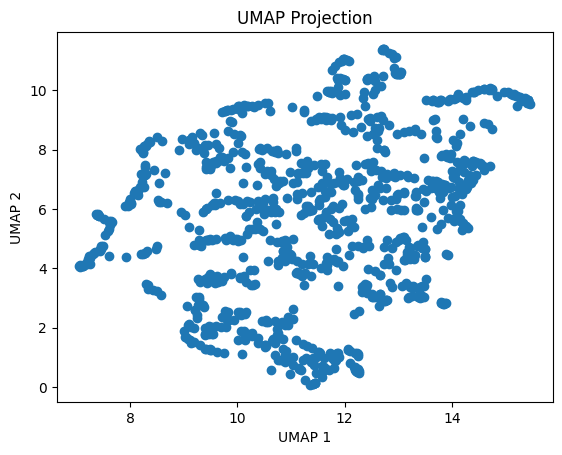

In [6]:
import umap
import matplotlib.pyplot as plt

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_result = umap_model.fit_transform(df_processed)

# Visualize
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.title('UMAP Projection')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


Clustering on Reduced Data
Apply a clustering algorithm like K-Means on the UMAP results.
Visualize clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


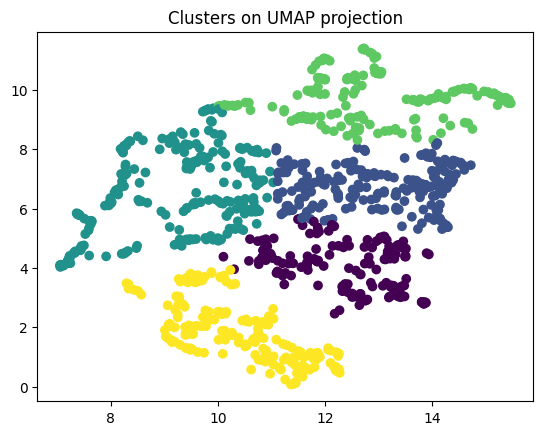

In [7]:
from sklearn.cluster import KMeans

# Clustering
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(umap_result)

# Visualize
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters)
plt.title('Clusters on UMAP projection')
plt.show()


Using UMAP for Feature Extraction in Classification
Use UMAP reduced features for a classification task.
Train a classifier (like Random Forest) and evaluate its performance.

In [10]:
# Assuming 'Category' is the column you want to predict
target = df['Categories']

# Remove the target column from the main dataframe to avoid using it in feature extraction
df_features = df.drop(columns=['Categories'])



In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DATA_MINING_DATASETS/youtubers_df.csv')

# Dropping irrelevant columns
df = df.drop(columns=['Username', 'Links'])

# Handling missing values
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df['Categories'] = imputer.fit_transform(df[['Categories']])

# Encoding categorical variables
categorical_features = ['Country', 'Categories']
categorical_transformer = OneHotEncoder()

# Normalizing numerical features
numerical_features = ['Rank', 'Suscribers', 'Visits', 'Likes', 'Comments']
numerical_transformer = StandardScaler()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the transformations
df_processed = preprocessor.fit_transform(df)



In [12]:
import umap

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_features = umap_model.fit_transform(df_processed)


In [13]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(umap_features, target, test_size=0.3)


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)


RandomForestClassifier()

In [15]:
from sklearn.metrics import classification_report

# Prediction and Evaluation
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))


                                    precision    recall  f1-score   support

                              ASMR       0.00      0.00      0.00         0
             ASMR, Comida y bebida       0.00      0.00      0.00         1
                         Animación       0.20      0.22      0.21         9
                  Animación, Humor       0.75      0.55      0.63        11
        Animación, Humor, Juguetes       0.00      0.00      0.00         1
               Animación, Juguetes       0.89      1.00      0.94         8
            Animación, Videojuegos       0.60      0.75      0.67         8
              Ciencia y tecnología       0.14      0.33      0.20         3
                Coches y vehículos       0.00      0.00      0.00         0
                   Comida y bebida       1.00      0.17      0.29         6
Comida y bebida, Salud y autoayuda       0.00      0.00      0.00         1
                  DIY y Life Hacks       0.00      0.00      0.00         0
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.